In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
data.head()

,Date,Open,High,Low,Close
0,01 Jan 2019,10881.7,10923.6,10807.1,10910.10
1,02 Jan 2019,10868.85,10895.35,10735.05,10792.50
2,03 Jan 2019,10796.8,10814.05,10661.25,10672.25
3,04 Jan 2019,10699.7,10741.05,10628.65,10727.35
4,07 Jan 2019,10804.85,10835.95,10750.15,10771.80


In [5]:
len(data)

971

In [6]:
data.drop(['Date','Open','High','Low'],axis=1,inplace=True)

In [7]:
data.head()

,Close
0,10910.10
1,10792.50
2,10672.25
3,10727.35
4,10771.80


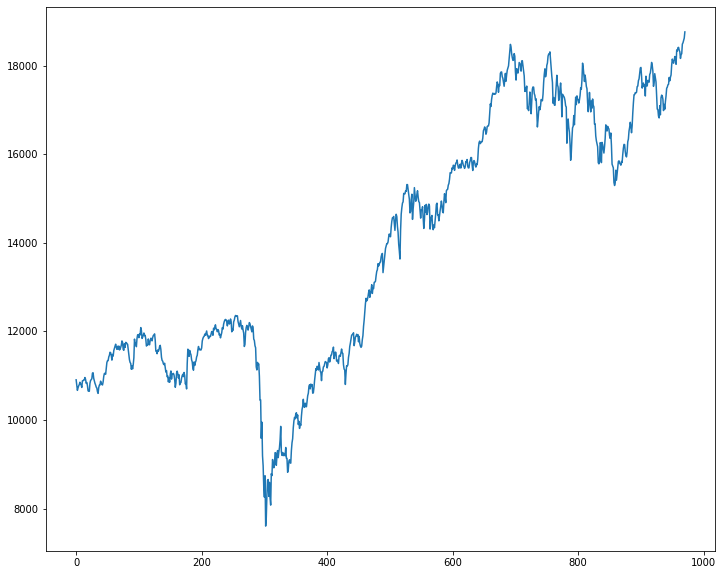

In [8]:
plt.figure(figsize=(12,10))
plt.plot(data['Close'])

In [9]:
data.shape

(971, 1)

In [10]:
test_size = 271
train_size = len(data)-test_size
train_size,test_size

(700, 271)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [12]:
data = scalar.fit_transform(data)

In [13]:
train_data = data[0:train_size,:]
test_data = data[train_size:len(data),:]
len(train_data),len(test_data)

(700, 271)

In [14]:
def train_test_data(dataset,time_gap=1):
    x,y = [],[]
    for i in range(len(dataset)-time_gap-1):
        values = dataset[i:(i+time_gap),0]
        x.append(values)
        y.append(dataset[i+time_gap,0])
    return np.array(x),np.array(y)

In [15]:
time_gap = 60
x_train,y_train = train_test_data(train_data,time_gap)
x_test,y_test = train_test_data(test_data,time_gap)

In [16]:
x_train

array([[0.29600111, 0.28545223, 0.27466564, ..., 0.33584198, 0.34741346,
        0.34398687],
       [0.28545223, 0.27466564, 0.27960818, ..., 0.34741346, 0.34398687,
        0.35519506],
       [0.27466564, 0.27960818, 0.28359541, ..., 0.34398687, 0.35519506,
        0.36002996],
       ...,
       [0.7298284 , 0.72650496, 0.73269885, ..., 0.96953741, 0.95588934,
        0.94795077],
       [0.72650496, 0.73269885, 0.73131744, ..., 0.95588934, 0.94795077,
        0.94228164],
       [0.73269885, 0.73131744, 0.74226998, ..., 0.94795077, 0.94228164,
        0.94322351]])

In [17]:
y_train

array([0.35519506, 0.36002996, 0.36408895, 0.36804029, 0.36182847,
       0.35770669, 0.3638019 , 0.35828975, 0.36434011, 0.35647779,
       0.35759008, 0.36178362, 0.36599062, 0.37467371, 0.37159247,
       0.35738825, 0.35572878, 0.36920193, 0.36163562, 0.37175842,
       0.37117536, 0.36907634, 0.36795508, 0.35772912, 0.34872759,
       0.33630843, 0.33113714, 0.32908298, 0.31735901, 0.32398346,
       0.31814838, 0.32712749, 0.34058719, 0.37836044, 0.36767252,
       0.37025592, 0.36300356, 0.37978221, 0.38701662, 0.38737543,
       0.38130713, 0.38891381, 0.3868417 , 0.40170971, 0.39570869,
       0.37975081, 0.38216378, 0.38683273, 0.39068092, 0.38535266,
       0.38605682, 0.37791642, 0.36435805, 0.36609377, 0.36608929,
       0.37867439, 0.36901804, 0.36682484, 0.37550793, 0.38009167,
       0.37955347, 0.3748262 , 0.38171078, 0.38572044, 0.38629901,
       0.38899005, 0.37682654, 0.35417246, 0.35393027, 0.34881729,
       0.3563522 , 0.35362528, 0.35684108, 0.3635014 , 0.36573

In [18]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(639, 60) (639,)
(210, 60) (210,)


In [19]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [21]:
model=Sequential()

In [22]:
model.add(LSTM(50,return_sequences=True,input_shape=(time_gap,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=1)

Epoch 1/10
639/639 [==============================] - 51s 63ms/step - loss: 0.0055 - val_loss: 0.0102
Epoch 2/10
639/639 [==============================] - 37s 58ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 3/10
639/639 [==============================] - 40s 63ms/step - loss: 0.0021 - val_loss: 0.0039
Epoch 4/10
639/639 [==============================] - 43s 68ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 5/10
639/639 [==============================] - 45s 70ms/step - loss: 9.9160e-04 - val_loss: 0.0010
Epoch 6/10
639/639 [==============================] - 43s 68ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 7/10
639/639 [==============================] - 44s 68ms/step - loss: 9.7190e-04 - val_loss: 0.0016
Epoch 8/10
639/639 [==============================] - 43s 68ms/step - loss: 7.9121e-04 - val_loss: 0.0014
Epoch 9/10
639/639 [==============================] - 44s 70ms/step - loss: 6.3016e-04 - val_loss: 8.1327e-04
Epoch 10/10
639/639 [==============================] - 44s 69m

In [25]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

7/7 [==============================] - 0s 42ms/step


In [26]:
print(y_train.shape,train_predict.shape)
print(y_test.shape,test_predict.shape)

(639,) (639, 1)
(210,) (210, 1)


In [28]:
y_train = y_train.reshape(639,1)
y_test = y_test.reshape(210,1)

In [29]:
print(y_train.shape,train_predict.shape)
print(y_test.shape,test_predict.shape)

(639, 1) (639, 1)
(210, 1) (210, 1)


In [30]:
def rmse(true,predict):
    mse = np.mean((true-predict)**2)
    return np.sqrt(mse)

In [31]:
train_error_transform = rmse(y_train,train_predict)
test_error_transform = rmse(y_test,test_predict)
print(train_error_transform)
print(test_error_transform)

0.025126220775470345
0.01906558252925983


In [32]:
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)
y_train = scalar.inverse_transform(y_train)
y_test = scalar.inverse_transform(y_test)

In [33]:
train_error = rmse(y_train,train_predict)
test_error = rmse(y_test,test_predict)
print(train_error)
print(test_error)

280.1096492074233
212.54497054562603


In [34]:
testpredictplot = np.empty_like(data)
testpredictplot[:,:] = np.nan
testpredictplot[len(train_predict)+(time_gap*2)+1:len(data)-1,:] = test_predict

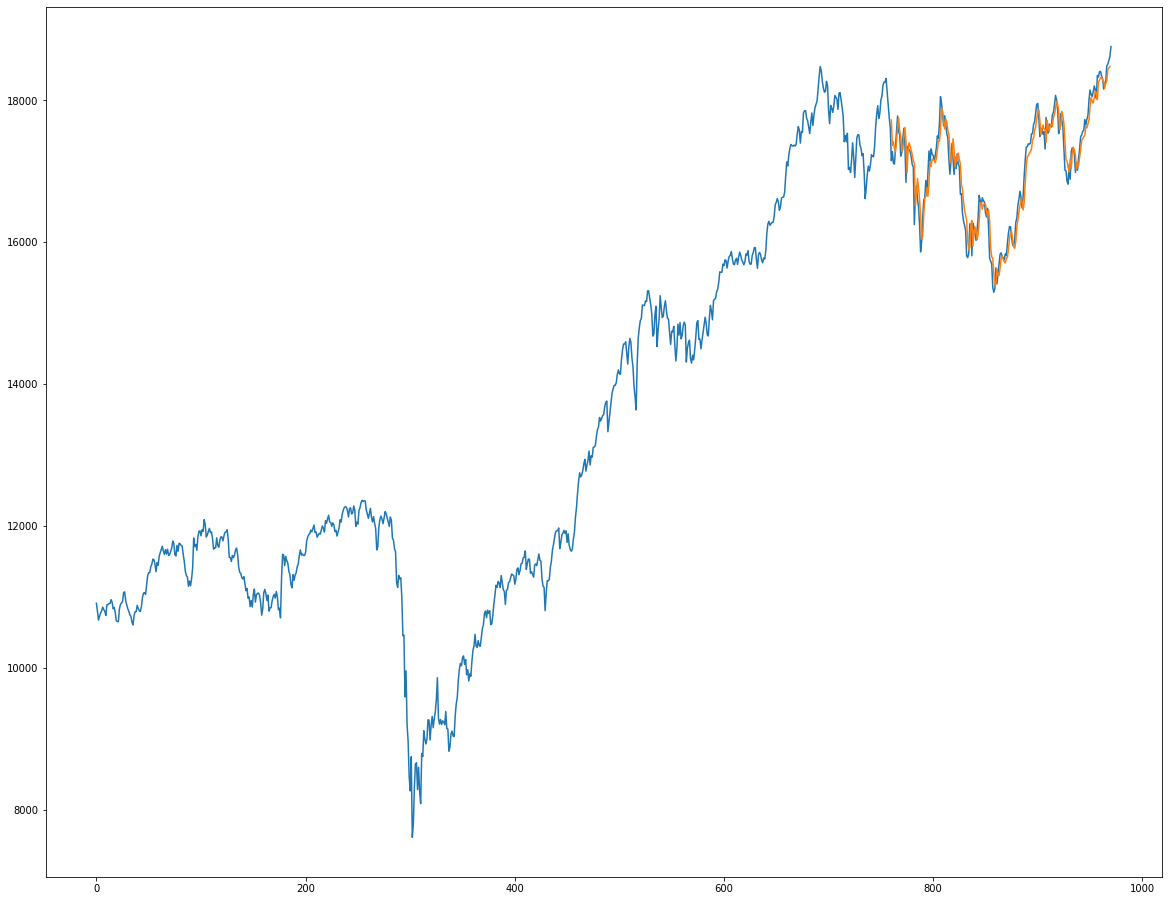

In [35]:
plt.figure(figsize=(20,16))
plt.plot(scalar.inverse_transform(data))
plt.plot(testpredictplot)
plt.show()